In [1]:
# Get the Numpy library (module), rename to "np"
import numpy as np

In [2]:
# Make a (pseudo-)random number generator.
rng = np.random.default_rng()

In [3]:
# Build up to one trial.
# We will choose from these two labels (strings).
choices = ['Black', 'White']
choices

['Black', 'White']

In [4]:
len(choices)

2

In [5]:
# Ask the random number generator thing to choose at
# random between the two choices.
rng.choice(choices)

'Black'

In [6]:
# Ask the random number generator thing to choose at
# random between the two choices, but where it chooses
# the first option ('Black') 26% of the time, and the second
# ('White') 74% of the time.
rng.choice(choices, p=[0.26, 0.74])

'White'

In [7]:
# As above, but now making 12 choices instead of 1.
one_jury = rng.choice(choices, p=[0.26, 0.74], size=12)
one_jury

array(['White', 'Black', 'White', 'White', 'White', 'White', 'Black',
       'White', 'White', 'White', 'White', 'Black'], dtype='<U5')

In [8]:
# Ask the comparison question == 'Black' of the array.
# We get a Boolean array in return.
one_jury == 'Black'

array([False,  True, False, False, False, False,  True, False, False,
       False, False,  True])

In [9]:
# A variable containing a simple number.
a = 10
a

10

In [10]:
# Asking a comparison question to which the answer is Yes (True)
a == 10

True

In [11]:
# Asking a comparison question to which the answer is No (False)
a == 11

False

In [12]:
# Reminder of our 12 randomly selected jurors.
one_jury

array(['White', 'Black', 'White', 'White', 'White', 'White', 'Black',
       'White', 'White', 'White', 'White', 'Black'], dtype='<U5')

In [13]:
# Now ask the == 'Black' question of the jurors array.
is_black = one_jury == 'Black'
is_black

array([False,  True, False, False, False, False,  True, False, False,
       False, False,  True])

In [14]:
# Show the number of True values in the is_black array.
# This is the number of == 'Black' jurors (the number of Black
# jurors).
np.count_nonzero(is_black)

3

In [15]:
# One whole trial in the simulated (no bias) world.
# This is just the lines above, compiled into one cell.
one_jury = rng.choice(choices, p=[0.26, 0.74], size=12)
is_black = one_jury == 'Black'
n_black = np.count_nonzero(is_black)
n_black

3

In [16]:
# An array of zeros, into which we will put the results of 10
# trials.
results = np.zeros(10)
results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# The procedure for 10 trials.
results = np.zeros(10)
for i in np.arange(10):
    print("We are currently running trial number", i)
    # Procedure for one trial, in body of for loop.
    # This is nothing but the trial procedure above, indented.
    # One trial in the simulated (no bias) world.
    one_jury = rng.choice(choices, p=[0.26, 0.74], size=12)
    print("The jury for this trial was", one_jury)
    is_black = one_jury == 'Black'
    n_black = np.count_nonzero(is_black)
    print("The number of black jurors was", n_black)
    results[i] = n_black
    print("The results array at this stage is", results)

We are currently running trial number 0
The jury for this trial was ['Black' 'White' 'White' 'Black' 'White' 'Black' 'Black' 'Black' 'Black'
 'White' 'White' 'White']
The number of black jurors was 6
The results array at this stage is [6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
We are currently running trial number 1
The jury for this trial was ['White' 'Black' 'Black' 'White' 'White' 'White' 'White' 'White' 'White'
 'White' 'White' 'White']
The number of black jurors was 2
The results array at this stage is [6. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
We are currently running trial number 2
The jury for this trial was ['White' 'White' 'White' 'White' 'White' 'White' 'White' 'White' 'White'
 'Black' 'White' 'White']
The number of black jurors was 1
The results array at this stage is [6. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
We are currently running trial number 3
The jury for this trial was ['White' 'White' 'White' 'White' 'Black' 'White' 'Black' 'White' 'Black'
 'White' 'White' 'White']
The number of black jurors was 3

In [18]:
# 10,000 trials.
n = 10_000
results = np.zeros(n)
for i in np.arange(n):
    # Procedure for one trial, in body of for loop.
    # One trial in the simulated (no bias) world.
    one_jury = rng.choice(choices, p=[0.26, 0.74], size=12)
    is_black = one_jury == 'Black'
    n_black = np.count_nonzero(is_black)
    results[i] = n_black
# Show the first 10 of the numbers
results[:10]

array([2., 5., 1., 2., 2., 6., 2., 8., 5., 4.])

In [19]:
# Show the array (notice Numpy only shows the first and last 3
# by default).
results

array([2., 5., 1., ..., 3., 3., 4.])

In [20]:
# The last 10 values of the array.
results[-10:]

array([4., 3., 0., 3., 5., 2., 5., 3., 3., 4.])

In [21]:
len(results)

10000

Text(0, 0.5, 'Number of times the count appeared in simulation')

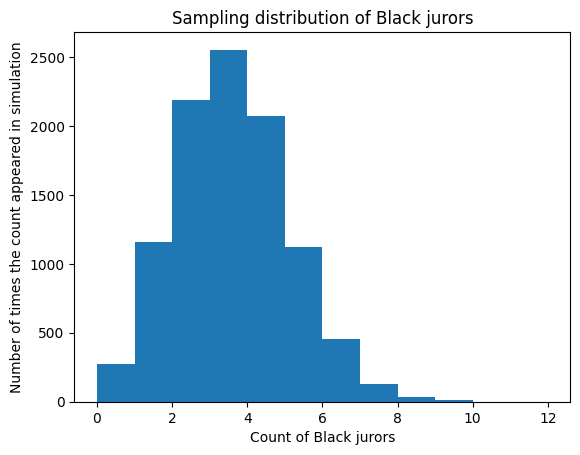

In [22]:
import matplotlib.pyplot as plt
plt.hist(results, bins=np.arange(0, 13))
plt.title('Sampling distribution of Black jurors')
plt.xlabel('Count of Black jurors')
plt.ylabel('Number of times the count appeared in simulation')

In [23]:
# The average number of Black jurors.
np.mean(results)

3.1145

In [24]:
# Boolean array with 10,000 values, where the element is True
# if the corresponding result element is 0, False otherwise.
results_equal_zero = results == 0
results_equal_zero

array([False, False, False, ..., False, False, False])

In [25]:
number_of_zeros = np.count_nonzero(results_equal_zero)
number_of_zeros

272

In [26]:
# The probability estimate
# Probability of seeing 0 in a world with no bias, 26% chance that
# any one juror will be Black.
p = number_of_zeros / 10000
p

0.0272